<p>Treinamento de uma rede MLP que efetuará a operação NOT XOR (ou XNOR)</p>
<p>Ao final, uma análise dos pesos aprendidos pela rede neural mostra o seu funcionamento</p>

# Imports

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.optimizers import SGD
from keras.callbacks import ModelCheckpoint, EarlyStopping

Using TensorFlow backend.


# Dados

In [7]:
x = [
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
]
x = np.array(x)

In [8]:
y = [1, 0, 0, 1]
y = np.array(y)

# Definição da Rede Neural
<p>Provavelmente a menor rede neural que vocês vão ver. Apenas uma camada oculta com dois neurônios e um único neurônio na camada de saída</p>

In [9]:
entrada = Input(shape=(2,))
oculta = Dense(2, activation='sigmoid')(entrada)
saida = Dense(1, activation='sigmoid')(oculta)

Instructions for updating:
Colocations handled automatically by placer.


In [10]:
model = Model(entrada, saida)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 2)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [11]:
sgd = SGD(lr=0.01, momentum=0.95)
model.compile(sgd, 'mean_squared_error', metrics=['accuracy'])

In [12]:
early_stopping = EarlyStopping(monitor='acc', baseline=0.80, patience=10000, mode='max')

# Treinamento
<p>Pode ser que você precise rodar algumas vezes para obter o resultado esperado (100% de acurácia)</p>
<p>Isso acontece pois a rede neural pode entrar em algum local ótimo e não conseguir sair</p>

In [13]:
history = model.fit(x,y, epochs=50000, batch_size=4, verbose=0, callbacks=[early_stopping])

Instructions for updating:
Use tf.cast instead.


In [15]:
losses = np.array(history.history['loss'])
accuracies =np.array(history.history['acc'])

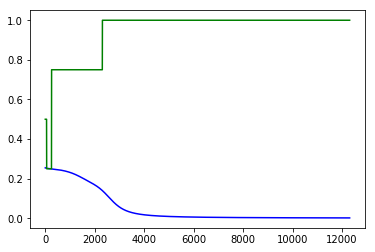

In [16]:
plt.plot(range(losses.shape[0]), losses, 'b')
plt.plot(range(accuracies.shape[0]), accuracies, 'g')

In [21]:
print(x)

[[0 0]
 [0 1]
 [1 0]
 [1 1]]


# Predições
<p>Muito próximo do XNOR (1, 0, 0, 1)</p>

In [17]:
model.predict(x)

array([[0.9560279 ],
       [0.03915617],
       [0.03925258],
       [0.9585284 ]], dtype=float32)

# Definindo modelo para obter as saídas da camada oculta
<p>Note que a saída do modelo anterior era a camada que chamamos de "saida", enquanto neste a camada de saída e a "oculta"</p>

In [18]:
model_oculta = Model(entrada, oculta)

In [19]:
for i in range(4):
    print("x: ", x[i])
    print("y: ", y[i])
    print("")
    saida_oculta = model_oculta.predict(x[i].reshape((1,2)))
    print("Saída oculta: ", saida_oculta)
    predicao = model.predict(x[i].reshape((1,2)))
    print("Predição: ", predicao)
    print("-------------------------------------")

x:  [0 0]
y:  1

Saída oculta:  [[0.07286891 0.002277  ]]
Predição:  [[0.9560279]]
-------------------------------------
x:  [0 1]
y:  0

Saída oculta:  [[0.9677865 0.1074968]]
Predição:  [[0.03915618]]
-------------------------------------
x:  [1 0]
y:  0

Saída oculta:  [[0.96652824 0.10663106]]
Predição:  [[0.03925258]]
-------------------------------------
x:  [1 1]
y:  1

Saída oculta:  [[0.9999094 0.8629986]]
Predição:  [[0.9585284]]
-------------------------------------


# Pesos que a rede aprendeu

In [20]:
model.get_weights()

[array([[5.906441 , 3.9569914],
        [5.946059 , 3.9660473]], dtype=float32),
 array([-2.543433 , -6.0826163], dtype=float32),
 array([[-8.043805],
        [ 8.734638]], dtype=float32),
 array([3.6454868], dtype=float32)]

<img src="imagens/rede_neural_xnor.jpg">

# O que cada neurônio faz?

<p>O primeiro neurônio da camada oculta aprendeu a fazer a operação OR</p>

<img src="imagens/neuronio_or.jpg">

<p>O segundo neurônio da camada oculta aprendeu a fazer a operação AND</p>

<img src="imagens/neuronio_and.jpg">

<p>Note o papel do viés nos neurônios acima</p>
<p>Para a função AND ambas as entradas devem ser somadas para superar o valor do viés e resultar em um valor de saída maior que zero, enquanto na função OR basta que uma das entradas seja igual a 1 para que a soma final seja maior que zero</p>

<p>E o neurônio da camada de saída? Que função aprendeu?</p>

<img src="imagens/neuronio_nota_or_b.jpg">

<p>O neurônio da camada de saída aprendeu a aplicar (NOT A OR B), onde A e B são os valores de saída da camada oculta</p>

# O que aconteceu?

### Fornecemos os dados de entrada e saída para a rede, dizendo "Aprenda a fazer o XNOR (NOT XOR)"

<img src="imagens/dados_xnor.jpg">

### Sejam A e B os valores de entrada, a rede aprendeu a seguinte função

<img src="imagens/funcao_rede.jpg">

<p>onde sig(x) é a aplicação da função sigmoide em x</p>

### A função aprendida pela rede é uma aproximação da seguinte função

<img src="imagens/funcao_ideal_rede.jpg">

# Conclusão

<p>A rede neural, por meio da combinação de funções não-lineares (sigmoide neste caso), aprendeu uma função matemática que se aproxima da função desejada (NOT XOR)</p>